In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
963,4849-PYRLQ,Female,1,No,No,56,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),73.25,4054.2,No
3255,4827-LTQRJ,Female,1,Yes,Yes,66,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),110.60,7210.85,No
4571,0599-XNYDO,Female,0,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.80,1540.35,No
4466,4806-KEXQR,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.90,324.3,Yes
6537,1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488].TotalCharges

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [13]:
df1=df[df.TotalCharges!=' ']

In [14]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


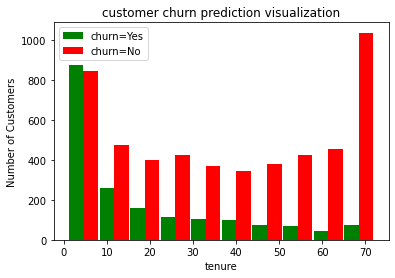

In [19]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("customer churn prediction visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

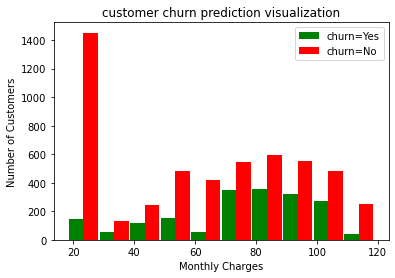

In [20]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("customer churn prediction visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [23]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [25]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [29]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5590,0,0,1,1,25,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5303,0,0,0,1,43,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
1190,0,0,0,0,38,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
5375,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
502,1,0,1,1,70,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [33]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [35]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [36]:
X_train.shape

(5625, 26)

In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weights=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print("classification Report:\n",classification_report(y_test,y_pred))
    
    return y_pred

In [38]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5107 - accuracy: 0.7602
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4318 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4140 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4126 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4128 - accuracy: 0.8025
Epoch 10/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4104 - accur

176/176 [==============================] - 1s 5ms/step - loss: 0.3581 - accuracy: 0.8370: 0s - los
Epoch 81/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3578 - accuracy: 0.8352
Epoch 82/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3573 - accuracy: 0.8343
Epoch 83/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3573 - accuracy: 0.8350
Epoch 84/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3559 - accuracy: 0.8350
Epoch 85/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3553 - accuracy: 0.8384
Epoch 86/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3556 - accuracy: 0.8348
Epoch 87/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3543 - accuracy: 0.8331
Epoch 88/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3552 - accuracy: 0.8304
Epoch 89/100
176/176 [==============================] - 1s 7ms/step - loss: 0.35

1. undersampling

In [39]:
count_class_0,count_class_1=df1.Churn.value_counts()

In [40]:
print(count_class_0,count_class_1)

5163 1869


In [41]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [42]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [43]:
df_test_under.shape

(3738, 27)

In [44]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

In [45]:
y.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [47]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [48]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5986 - accuracy: 0.6973
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5117 - accuracy: 0.7552
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4924 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4853 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4820 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4793 - accuracy: 0.7729
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4764 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4741 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4735 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4717 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3987 - accuracy: 0.8147
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3991 - accuracy: 0.8177
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3992 - accuracy: 0.8130
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3983 - accuracy: 0.8130
Epoch 87/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3971 - accuracy: 0.8147
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3962 - accuracy: 0.8167
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3946 - accuracy: 0.8214
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3971 - accuracy: 0.8211
Epoch 91/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3953 - accuracy: 0.8237
Epoch 92/100


2.oversampling

In [49]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [50]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [51]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [52]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 7ms/step - loss: 0.5896 - accuracy: 0.7027
Epoch 2/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4945 - accuracy: 0.7620
Epoch 3/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4852 - accuracy: 0.7639
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4805 - accuracy: 0.7691
Epoch 5/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4763 - accuracy: 0.7736
Epoch 6/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4731 - accuracy: 0.7736
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4711 - accuracy: 0.7782
Epoch 8/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4667 - accuracy: 0.7789
Epoch 9/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4656 - accuracy: 0.7789
Epoch 10/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4628 - accura

259/259 [==============================] - 1s 6ms/step - loss: 0.3800 - accuracy: 0.8306
Epoch 82/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3781 - accuracy: 0.8282
Epoch 83/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3780 - accuracy: 0.8317
Epoch 84/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3772 - accuracy: 0.8304
Epoch 85/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3786 - accuracy: 0.8292
Epoch 86/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3773 - accuracy: 0.8309
Epoch 87/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3764 - accuracy: 0.8298
Epoch 88/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3758 - accuracy: 0.8299
Epoch 89/100
259/259 [==============================] - 2s 8ms/step - loss: 0.3769 - accuracy: 0.8333
Epoch 90/100
259/259 [==============================] - 2s 10ms/step - loss: 0.3760 - accuracy:

3.SMOTE

In [53]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [54]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=1,stratify=y_sm)

In [56]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [57]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 6ms/step - loss: 0.5270 - accuracy: 0.7516
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4725 - accuracy: 0.7729
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4660 - accuracy: 0.7748
Epoch 4/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4601 - accuracy: 0.7823
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4544 - accuracy: 0.7832
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4509 - accuracy: 0.7857
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4466 - accuracy: 0.7875
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4438 - accuracy: 0.7904
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4391 - accuracy: 0.7914
Epoch 10/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4352 - accura

Epoch 81/100
259/259 [==============================] - 2s 8ms/step - loss: 0.3485 - accuracy: 0.8432
Epoch 82/100
259/259 [==============================] - 2s 8ms/step - loss: 0.3467 - accuracy: 0.8458
Epoch 83/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3475 - accuracy: 0.8447
Epoch 84/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3445 - accuracy: 0.8487
Epoch 85/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3490 - accuracy: 0.8431
Epoch 86/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3440 - accuracy: 0.8473
Epoch 87/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3459 - accuracy: 0.8459
Epoch 88/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3457 - accuracy: 0.8453
Epoch 89/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.8477
Epoch 90/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3461

4.ensembling with undersampling

In [58]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [61]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [63]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [64]:
df3=X_train.copy()
df3['Churn']=y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1038,0,0,1,0,0.774648,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1016,0,0,1,0,0.985915,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3255,1,1,1,1,0.915493,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
6381,0,0,0,1,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6296,1,1,1,0,0.422535,0,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0


In [65]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [66]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return X_train,y_train

In [70]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.6146 - accuracy: 0.6953
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5229 - accuracy: 0.7602
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4962 - accuracy: 0.7656
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4872 - accuracy: 0.7706
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4744 - accuracy: 0.7749
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4713 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4701 - accuracy: 0.7783
Epoch 10/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4694 - accuracy: 0.7709
Epoch 11/

Epoch 83/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4091 - accuracy: 0.8067
Epoch 84/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4059 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4070 - accuracy: 0.8090
Epoch 86/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4067 - accuracy: 0.8084
Epoch 87/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4087 - accuracy: 0.8117
Epoch 88/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4054 - accuracy: 0.8094
Epoch 89/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4053 - accuracy: 0.8127
Epoch 90/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4039 - accuracy: 0.8097
Epoch 91/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4037 - accuracy: 0.8120
Epoch 92/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4033 - accuracy: 0.8144:

In [71]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5715 - accuracy: 0.7348
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5106 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4953 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4890 - accuracy: 0.7615
Epoch 5/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4778 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4737 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4716 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4676 - accuracy: 0.7692
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8244
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8214
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8201
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8157
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8237
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8261
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8251
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8197
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8261
Epoch 93/100


In [72]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6376
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7620
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7708
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7723
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7742
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7746
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7719
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7757
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7791
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8266
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8228
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8228
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8209
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8288
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8269
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8296
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8345
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8277
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8330
Epoch 93/100


In [73]:
len(y_pred1)

1407

In [74]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [75]:
cl_rep=classification_report(y_test,y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.46      0.79      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407

